## Difficulty mining vs iterations (bitcoin)

In this paper, we  focused on the link and behavior  between iteration needed to find a nonce and the difficulty miningin  the mining process, one of the most crucial step of the PoW consensus, used in many permissionless blockchains such as bitcoin.
If we decrease the difficulty, the set of possible solutions increases. So  a natural question arise:  how does this impact the brute force of searching for the nonce.  To answer this question, a first step that we explore in this direction is an experimental study to see if there are correlations between the number of search iterations involved in the  energy consumption and the difficulty  mining. For that, we  first recall the technical background  of the  difficulty mining in the Bitcoin, which depends on two value, the target and the difficulty.

Let $sha256$ be the hash function  that generates a  256-bit (32-byte) number in an almost unique way, and $MRK(x_1,x_2,...,x_p)$ the Merkle tree of the transactions. To generate a block in Bitcoin, miners work independently  on solving the following problem \cite{b7}:
\begin{equation}
    \begin{cases} 
\hbox{Find a nonce (32-bit number) such that:} \\ \\
sha256(Bh || MRK(x_1,x_2,...,x_p)||Nonce) \leq T,
\end{cases}
\label{ineq}
\end{equation}
where $Bh$ is the hash of the last generated block and $T$ is a fixed target  which represents 256-bit number. This inequality fixes an interval of admitted solutions in the following sense:  each miner performs a brute force search of nonce which, when concatenated with $Bh$ and $MRK(x_1,x_2,...,x_p)$ forms a character string $S$, such that $sha256(S) \leq T.$ 
Miners rely on the hashcash  \cite{b9} algorithm to find the nonce, where a starting nonce is tested in \eqref{ineq}  and then incremented after each test until the inequality is satisfied.  If all the miners start with the same nonce, it is considered the same  duplicated work and therefore wasted, and the first one who present  the nonce will be rewarded. To avoid this situation, in bitcoin the nonce is composed of two values: a randomized nonce different from one miner to another seen as a starting point to launch the hashcash and the nonce that will be incremented each time the inequality \eqref{ineq} test fails.

The  larger  the target is,  the easier the PoW problem will be, since the solutions set will be large, and this is where the notion of difficulty mining  takes place. It measures  how hard it is to find the nonce, in other words how hard it is to mine a block. It has the following expression: 
$$
D= \frac{Target1}{T },
$$
where $Target1$ is the maximum target used in the beginning of the bitcoin associated with the lowest difficulty (difficulty 1)  and $T$ (current target) is the number of solutions for which  $sha256$  are less or equal
 $T$, as the difficulty increases, the set of possible solutions becomes smaller, which makes mining difficult.

In our model, we propose that this difficulty is adjusted according to the number of agreement notifications that the miner receives. The question now is how to adjust this difficulty so that the block mining  is easy for a group of miners and difficult for other group of miners.  For this purpose, we consider  an experimental study in the following section  to explore  the impact of the variation of the difficulty of the mining on the number of increments performed to find a good candidate for the inequality.
%For example, if a miner receives 4 notifications which represent the number of miners who agree with him, the number of possible solutions for him increases by 4.

## Experiments

By definition, if the difficulty increases, the space of candidates that solve \eqref{ineq}  decreases, and since the hash function returns a number between $0$ and $2^{256}$, we expect that the total number of iterations (less or equal $2^{32}$) to find the nonce increases. In this context, we are interested in the behavior of this growth of total iterations needed to test inequality \eqref{ineq}. The  experimental study will give us a first overview  of this behavior, to understand how to vary the difficulty for different groups of miners and therefore  impact the mining process to decrease the number of iterations. 


We consider the following parameters involved in the mining process in simplified setting :
*  Number of all possible nonce is $2^{32}$,
*  Target =$2^{256-p}$.



Clearly for the chosen difficulty the larger $p$ is, the more the number of hash that satisfies \eqref{ineq} decreases. We test PoW by initializing the nonce by 3 values $Nonce\in \{0,10000, 250000 \}$  and incremented by one unit each time inequality \eqref{ineq} is tested. For  fixed difficulty (fixed $p$),  in each iteration, where nonce is incremented,  we test $$sha256(Bh || MRK(x_1,x_2,...,x_p)||Nonce) \leq Target,$$ until it is satisfied, we then consider the total iterations performed to find the good candidate associated with the fixed difficulty. 

In [3]:

import hashlib
import time

max_nonce = 2 ** 32 # 4 billion
def proof_of_work(start, header, difficulty_bits):
    iteer = 0
    target = 2 ** (256 - difficulty_bits)
    for nonce in range(start,max_nonce,1):
        iteer = iteer + 1
        hash_result = hashlib.sha256((str(header) + str(nonce)).encode('utf-8')).hexdigest()
        if  int(hash_result, 16) < target:
            print ("Success with nonce %d" % nonce)
            print ("Hash is %s" % hash_result)
            print ("Number of iterations is %s" % iteer)
            return (start, hash_result, nonce, iteer)
    print ("Failed after %d (max_nonce) tries" % nonce)
    return nonce


if __name__ == '__main__':
    nonce = 0
    hash_result = ''
    L = []
    start=0
    #32 bit normalement
    for difficulty_bits in range(30):
        C = []
        difficulty = 2 ** difficulty_bits
        print( "")
        print ("Difficulty: %ld (%d bits)" % (difficulty, difficulty_bits))
        print ("Starting search...")
        start_time = time.time()
        new_block = 'test block with transactions'
        for start in [0,10000,250000]:
            (start, hash_result, nonce,iteer) = proof_of_work(start,new_block, difficulty_bits)
            end_time = time.time()
            elapsed_time = end_time - start_time
            print ("Elapsed time: %.4f seconds" % elapsed_time)
            print ("Start nonce: %.4f " % start)
            if elapsed_time > 0: 
                hash_power = float(int(nonce)/elapsed_time)
                C = [(difficulty, start, iteer)]
                L= L + C
            print ("Hashing power: %ld hashes per second" % hash_power)


Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is ff8253ed10b5f719d52a709a66af8cd5e2054f702e675af4ca0cae70f0988634
Number of iterations is 1
Elapsed time: 0.0000 seconds
Start nonce: 0.0000 
Hashing power: 0 hashes per second
Success with nonce 10000
Hash is 46d4e32c4c13e1a850fc733d9bc4bbb9106721576a5dad5b1fffed55f67d200d
Number of iterations is 1
Elapsed time: 0.0001 seconds
Start nonce: 10000.0000 
Hashing power: 171196081 hashes per second
Success with nonce 250000
Hash is 53f920cbed8aabc871d8f6474a57e122e3b4c48bd7d11c277ac75fc73fe1ef71
Number of iterations is 1
Elapsed time: 0.0001 seconds
Start nonce: 250000.0000 
Hashing power: 3350083067 hashes per second

Difficulty: 2 (1 bits)
Starting search...
Success with nonce 1
Hash is 35b762ab588a45d9328373398bf4e67da70064dd702ee9736da7972d63c59e8b
Number of iterations is 2
Elapsed time: 0.0000 seconds
Start nonce: 0.0000 
Hashing power: 97541 hashes per second
Success with nonce 10000
Hash is 46d4e32c4c13e1a850fc73

In [15]:
C1=[L[i] for i in range(0,len(L),3)]


## Experimental results 
The following figures shows the number of iterations of finding the nonce in the PoW for a fixed difficulty with different starting nonce:




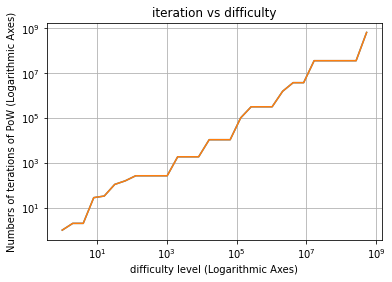

In [10]:

x1 = [C1[i][2]for i in range(len(C1))]
y1 = [C1[i][0]for i in range(len(C1))]
# plotting the line 1 points
plt.plot(y1, x1, label = " Elapsed time vs difficulty")
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.plot(y1, x1)
 

# naming the x axis
plt.ylabel('Numbers of terations of PoW (Logarithmic Axes)')
# naming the y axis
plt.xlabel('difficulty level (Logarithmic Axes)')
 
# giving a title to my graph
plt.title('iteration vs difficulty')
 
# function to show the plot
plt.show()

In [11]:
C2=[L[i] for i in range(1,len(L),3)]
C2

[(1, 10000, 1),
 (2, 10000, 1),
 (4, 10000, 3),
 (8, 10000, 9),
 (16, 10000, 13),
 (32, 10000, 13),
 (64, 10000, 13),
 (128, 10000, 13),
 (256, 10000, 13),
 (512, 10000, 13),
 (1024, 10000, 13),
 (2048, 10000, 721),
 (4096, 10000, 721),
 (8192, 10000, 721),
 (16384, 10000, 721),
 (32768, 10000, 721),
 (65536, 10000, 721),
 (131072, 10000, 90423),
 (262144, 10000, 304685),
 (524288, 10000, 304685),
 (1048576, 10000, 304685),
 (2097152, 10000, 1534036),
 (4194304, 10000, 3718223),
 (8388608, 10000, 3718223),
 (16777216, 10000, 35581677),
 (33554432, 10000, 35581677),
 (67108864, 10000, 35581677),
 (134217728, 10000, 35581677),
 (268435456, 10000, 35581677),
 (536870912, 10000, 645561810)]

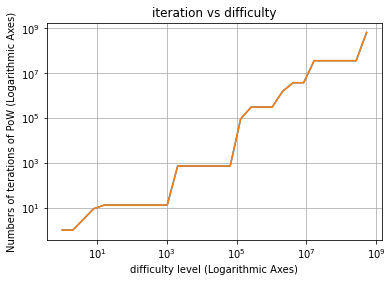

In [12]:

x1 = [C2[i][2]for i in range(len(C2))]
y1 = [C2[i][0]for i in range(len(C2))]
# plotting the line 1 points
plt.plot(y1, x1, label = " Elapsed time vs difficulty")
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.plot(y1, x1)
# naming the y axis
plt.xlabel('difficulty level (Logarithmic Axes)')
 # naming the x axis
plt.ylabel('Numbers of terations of PoW (Logarithmic Axes)')

 
# giving a title to my graph
plt.title('iteration vs difficulty')
 
# function to show the plot
plt.show()

In [13]:
C3=[L[i] for i in range(2,len(L),3)]
C3

[(1, 250000, 1),
 (2, 250000, 1),
 (4, 250000, 3),
 (8, 250000, 3),
 (16, 250000, 3),
 (32, 250000, 3),
 (64, 250000, 152),
 (128, 250000, 227),
 (256, 250000, 227),
 (512, 250000, 227),
 (1024, 250000, 2514),
 (2048, 250000, 2514),
 (4096, 250000, 8689),
 (8192, 250000, 8689),
 (16384, 250000, 64685),
 (32768, 250000, 64685),
 (65536, 250000, 64685),
 (131072, 250000, 64685),
 (262144, 250000, 64685),
 (524288, 250000, 64685),
 (1048576, 250000, 64685),
 (2097152, 250000, 1294036),
 (4194304, 250000, 3478223),
 (8388608, 250000, 3478223),
 (16777216, 250000, 35341677),
 (33554432, 250000, 35341677),
 (67108864, 250000, 35341677),
 (134217728, 250000, 35341677),
 (268435456, 250000, 35341677),
 (536870912, 250000, 645321810)]

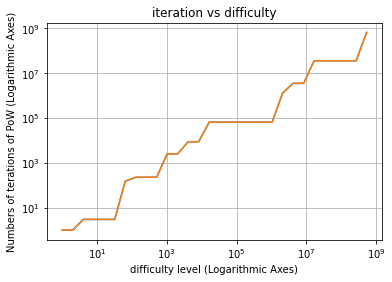

In [14]:

x1 = [C3[i][2]for i in range(len(C3))]
y1 = [C3[i][0]for i in range(len(C3))]
# plotting the line 1 points
plt.plot(y1, x1, label = " Elapsed time vs difficulty")
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.plot(y1, x1)
 
    # naming the y axis
plt.xlabel('difficulty level (Logarithmic Axes)')
# naming the x axis
plt.ylabel('Numbers of terations of PoW (Logarithmic Axes)')
# naming the y axis
 
# giving a title to my graph
plt.title('iteration vs difficulty')
 
# function to show the plot
plt.show()

### The previous figures can be  explained in intuitive way as follow:
  *   A high difficulty means a restricted space of hash results, which increases the number of iterations to find the nonce, so we notice an increasing behavior between the difficulty and the total number of iterations. 
  *  A a non-linear behavior and phases of stagnation are observed, where even if the difficulty increases we can perform almost the same iterations to find the right candidates. There are phases where the iterations are constant. This can be explained by the randomness and unstructured nature of the hash function :  the output of hash function must be  uncorrelated from the input.

Indeed  by changing the difficulty  to reduce the set of possible solutions of the nonce, the PoW becomes difficult, but recall that, our goal is to minimize the total iterations by adjusting this difficulty, where each miner will have a difficulty that depends on the number of miners who have the same block as him.  A first naive idea is to reduce the difficulty,
 but according to the experimental results an interesting behaviors appear. From the previous remarks the gap between the difficulties must be big to reduce significantly the number of iterations. If the gap between difficulties is small it may not decrease the iterations,  we observe a phenomena of iteration constancy.  



## Conclusion and futures works

In this paper, we  focused on the possibility of reducing the energy consumed during the mining process, one of the most crucial step of the PoW consensus, used in many permissionless blockchains such as bitcoin. We propose to reduce this energy by acting on the difficulty  mining  during the generation of a block, first by removing conflicting transactions before mining to prevent the attack, which is part of the conditions necessary to secure the blockchain of bitcoin. Then we focused on the adjustment of the difficulty in order to reduce total iterations performed in the mining. The experimental results lead us to the following future works:

 * Model the link between the difficulty and the number of iterations to formalize the observed non-linear behavior. 
*  Formalize the necessary gap between different difficulties to modify the number of iterations and reduce them.

## REFERENCES
*  Nakamoto, S. Bitcoin: A peer-to-peer electronic cash system. Decentralized Business Review, 2008. p. 21260. 
\bibitem{b2} Zheng, Z., Xie, S., Dai, H. N., Chen, X., \& Wang, H. Blockchain challenges and opportunities: A survey. International Journal of Web and Grid Services, 2018. 14(4), 352-375. 
*  O’Dwyer KJ, Malone D. Bitcoin mining and its energy
footprint. 2014 In: 25th IET Irish signals \&  systems conference 2014,
pp 280–285

*  Eshani, G., Rajdeep, D., Shubhankar, R., \& Baisakhi, D. An Analysis of Energy Consumption of Blockchain Mining and Techniques to Overcome It. In Proceedings of International Conference on Computational Intelligence, Data Science and Cloud Computing. Springer, Singapore, 2021, pp. 783-792. 

* Sedlmeir, J., Buhl, H. U., Fridgen, G., \& Keller, R. The energy consumption of blockchain technology: beyond myth. Business \& Information Systems Engineering, 2020, 62(6), 599-608. 
* Platt, M., Sedlmeir, J., Platt, D., Tasca, P., Xu, J., Vadgama, N., \& Ibañez, J. I. Energy footprint of  Karame, G. O., Androulaki, E., \& Capkun, S. Double-spending fast payments in bitcoin. In Proceedings of the 2012 ACM conference on Computer and communications security, 2012, pp. 906-917. 
*  Podolanko, J. P., Ming, J., \& Wright, M. Countering double-spend attacks on bitcoin fast-pay transactions. In Proc. Workshop Technol. Consum. Protection, 2017, pp. 1-3. 
*   https://en.bitcoin.it/wiki/Hashcash.


*    Zhang, F. Eyal, I. Escriva, R.  Juels, A., \&  Van Renesse, R. REM: resource-efficient mining for blockchains. In Proceedings of the 26th USENIX Conference on Security Symposium (SEC'17). USENIX Association, USA,2017, 1427–1444.
*   Daian, P., Eyal, I., Juels, A., \& Sirer, E. G. (Short Paper) piecework: Generalized outsourcing control for proofs of work. In International Conference on Financial Cryptography and Data Security 2017 (pp. 182-190). Springer, Cham.
